We aim to accomplist the following for this study:

Identify and visualize which factors contribute to customer churn:

Build a prediction model that will perform the following:

Classify if a customer is going to churn or not
Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5310,5311,15624744,Tai,622,Germany,Male,42,9,115766.26,1,0,0,72155.85,1
1163,1164,15600997,Demuth,747,Germany,Female,32,5,67495.04,2,0,1,77370.37,0
3030,3031,15725660,Dellucci,676,France,Male,20,1,80569.73,1,0,0,68621.98,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
3832,3833,15653315,Kang,555,Spain,Female,35,1,0.00,2,1,0,101667.00,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#checking null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

so we have nonull values

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# dropping irrevelant cols
df = df.drop(["RowNumber", "CustomerId","Surname"], axis = 1)

  we will not require the first 2 attributes(RowNumber,CustomerID) as the are specific to a customer. The surname of a customer has no impact on their decision to leave the bank.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

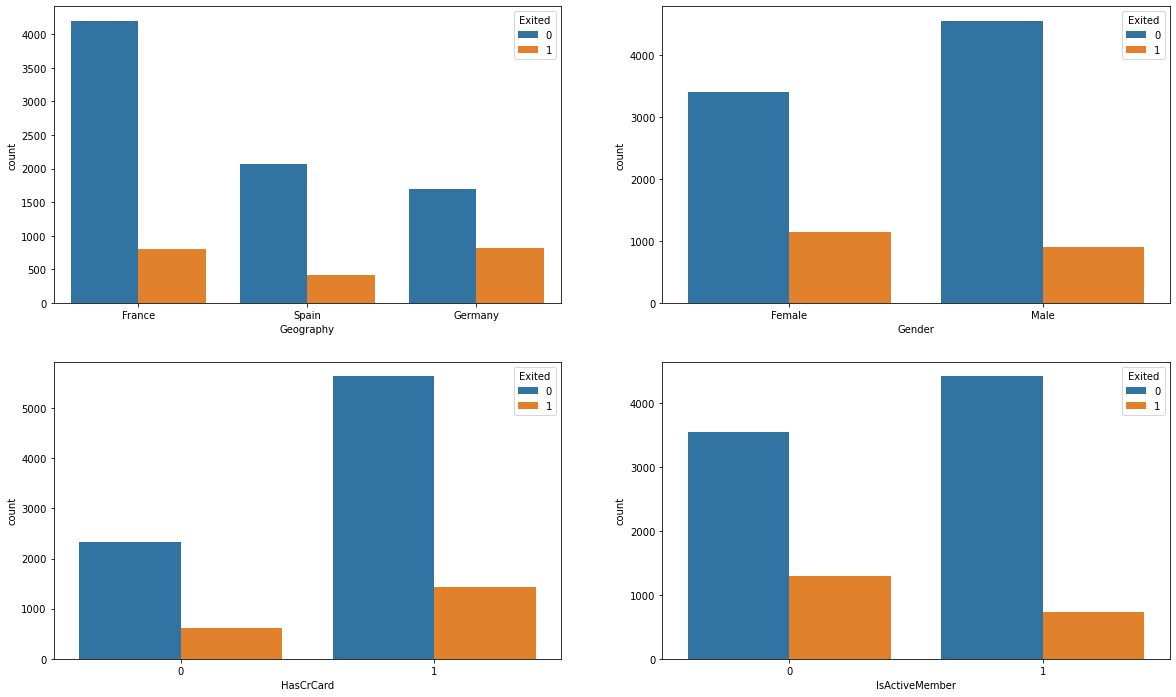

In [9]:
#Relation with categorical values
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(data = df, x = 'Geography', hue='Exited', ax = axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

1. Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
2. The proportion of female customers churning is also greater than that of male customers
3. Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
4. Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

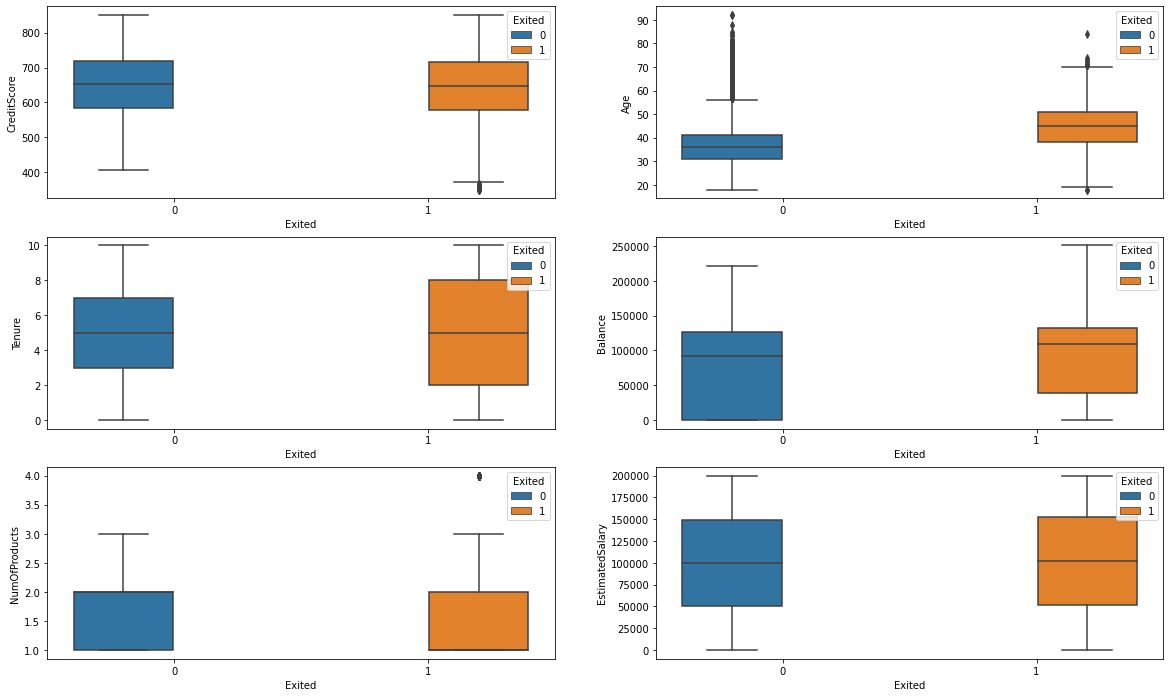

In [10]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

1. There is no significant difference in the credit score distribution between retained and churned customers.
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
3. With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
4. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
5. Neither the product nor the salary has a significant effect on the likelihood to churn.

In [11]:
#Encoding Categorical value 
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df = pd.get_dummies(df,drop_first = True)

In [13]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9961,573,44,9,0.00,2,1,0,107124.17,0,0,1,1
459,637,37,8,0.00,1,1,1,186062.36,0,0,1,1
3648,545,47,8,105792.49,1,0,1,67830.20,1,0,0,1
4944,630,53,5,138053.67,1,0,1,114110.97,0,0,0,1
8286,632,28,7,155519.59,1,1,0,1843.24,0,0,1,1


now we have numerical colms only which we can send to our model. ML model only understands numbers

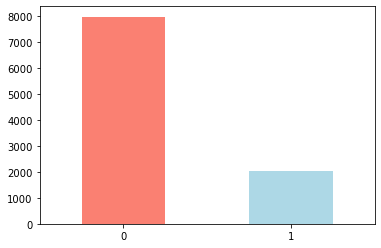

In [14]:
df.Exited.value_counts().plot(kind = 'bar', color=["salmon", "lightblue"])
plt.xticks(rotation = 360)
plt.show()

We can see imbalanced dataset so we will handle this later

In [15]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [16]:
from imblearn.over_sampling import SMOTE 

In [17]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [21]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2, random_state = 7)

In [24]:
#Scaling

from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
accuracy_score(y_test,y_pred1)

0.7802887633396108

In [30]:
precision_score(y_test,y_pred1)

0.7738814993954051

In [31]:
recall_score(y_test,y_pred1)

0.797011207970112

In [32]:
f1_score(y_test,y_pred1)

0.7852760736196319

# SVM

In [33]:
from sklearn import svm
svm= svm.SVC()

In [34]:
svm.fit(X_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred2)

0.8273697426239799

In [37]:
precision_score(y_test,y_pred2)

0.8279503105590063

# KNeighbour Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred3 = knn.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred3)

0.8091650973006905

In [43]:
precision_score(y_test,y_pred3)

0.7963182897862233

# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred4 = dt.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred4)

0.7796610169491526

In [49]:
precision_score(y_test,y_pred4)

0.7739393939393939

# Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred5 = rf.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred5)

0.8562460765850597

In [57]:
precision_score(y_test,y_pred5)

0.8538840937114673

# Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier()

In [61]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [62]:
y_pred6 = gbc.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred6)

0.8342749529190208

In [64]:
precision_score(y_test,y_pred6)

0.832716049382716

In [68]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN','DT', 'RF', 'GB'],
                          'ACC' : [accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)],
                          'Precision' : [precision_score(y_test,y_pred1),
                                        precision_score(y_test,y_pred2),
                                        precision_score(y_test,y_pred3),
                                        precision_score(y_test,y_pred4),
                                        precision_score(y_test,y_pred5),
                                        precision_score(y_test,y_pred6)]})


In [69]:
final_data

,Models,ACC,Precision
0,LR,0.780289,0.773881
1,SVC,0.827370,0.827950
2,KNN,0.809165,0.796318
3,DT,0.779661,0.773939
4,RF,0.856246,0.853884
5,GB,0.834275,0.832716


We can see Random forest is giving best accuracy therefore we will use it as our final model

<AxesSubplot:xlabel='Models', ylabel='Precision'>

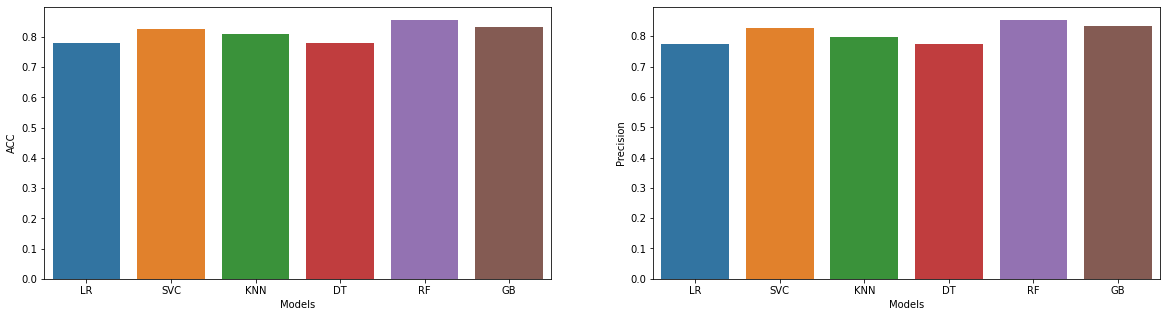

In [85]:
fig,axs = plt.subplots(1,2,figsize = (20,5))
sns.barplot(final_data['Models'], final_data["ACC"], ax = axs[0])
sns.barplot(final_data['Models'], final_data["Precision"], ax = axs[1])


# Save the model

In [86]:
#scaling entire dataset
X_res = sc.fit_transform(X_res)


In [87]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [88]:
import joblib

In [89]:
joblib.dump(rf,'ChurnPrediction')

['ChurnPrediction']

In [90]:
model = joblib.load("ChurnPrediction")

In [92]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [94]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)